<H1>Admission Status of High School Graduates</H1>

> By: Erina Yuniar

In this notebook, I will perform Exploratory Data Analysis on admission status of high school graduates. 
Features in this dataset:


1. gre_score : GRE score
2. toefl_score: TOEFL score
3. univ_ranking: University ranking
4. motiv_letter_strength: Motivation letter strength score
5. recommendation_strength: Recommendation strength score
6. gpa: GPA Score
7. research_exp: yes -- The student have a research experience, no -- The student don't have a research experience
8. admit_status: 0 -- Not admitted, 1 -- admitted to the university











# Load Data & Import libraries

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving admission_data.csv to admission_data.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
admission = pd.read_csv("admission_data.csv")

# Looking at the Data

In [ ]:
admission.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


In [ ]:
admission.sample(10)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
409,300.0,NaN,1.0,2.0,2.5,8.02,no,0
80,312.0,105.0,3.0,2.0,3.0,8.02,yes,0
371,324.0,110.0,3.0,3.5,3.0,9.22,yes,1
27,298.0,98.0,2.0,1.5,2.5,7.50,yes,0
295,317.0,100.0,2.0,3.0,2.5,8.57,no,0
191,323.0,110.0,5.0,4.0,5.0,8.98,yes,1
64,325.0,111.0,3.0,3.0,3.5,8.70,no,0
445,328.0,116.0,5.0,4.5,5.0,9.08,yes,1
253,335.0,115.0,4.0,4.5,4.5,9.68,yes,1
222,324.0,113.0,4.0,4.5,4.0,8.79,no,1


Observations: <br>
No obvious defect on the data, all looks good, and there is no key/identifier column that must be dropped

# General Information

In [ ]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


Observations: <br>
1. Admission data contains 505 rows and 8 columns
2. research_exp and admit_status columns have no missing values

# Data Cleansing

In [ ]:
admission.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
dtype: int64

In [ ]:
100 * admission.isna().sum()/len(admission)

gre_score                  1.782178
toefl_score                1.584158
univ_ranking               1.386139
motiv_letter_strength      0.396040
recommendation_strength    1.188119
gpa                        0.792079
research_exp               0.000000
admit_status               0.000000
dtype: float64

In [ ]:
admission.duplicated().sum()

5

Observations: <br>
1. Missing values in admission data are less than 2%, so it is not affected anything if I drop the missing value
2. This data has 5 duplicated rows that need to be eliminated

In [ ]:
admission = admission.dropna()

In [ ]:
admission.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
dtype: int64

In [ ]:
admission[admission.duplicated(keep=False)].sort_values('gpa').head(6)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
10,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
111,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
74,314.0,106.0,3.0,3.0,5.0,8.90,no,1
364,313.0,102.0,3.0,3.5,4.0,8.90,yes,1


In [ ]:
admission = admission.drop_duplicates()

In [ ]:
admission.duplicated().sum()

0

# Data Understanding

In [ ]:
categoricals = ['research_exp']

numericals = ['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength','recommendation_strength','gpa','admit_status']

In [ ]:
admission[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,316.327586,107.090517,3.118534,3.366379,3.476293,8.567241,0.571121
std,11.242104,5.934888,1.119704,0.968974,0.919244,0.598476,0.495450
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,9.025000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


Observations:

1.   The data is symmetrical distributed because mean and 50%(median) of all columns is almost the same, except admit_status
2.   Mean << 50% (median) in admit_status indicating the dominant value in this column is '1' (admit_status is a boolean column)



In [ ]:
admission[categoricals].describe()

,research_exp
count,464
unique,2
top,yes
freq,252


In [ ]:
for col in categoricals[0:]:
  print(admission[col].value_counts(), '\n')

yes    252
no     212
Name: research_exp, dtype: int64 



Observations:

1.   Column research_exp has 2 unique values
2.   There are more students who have research experience than those who don't



# Univariate Analysis

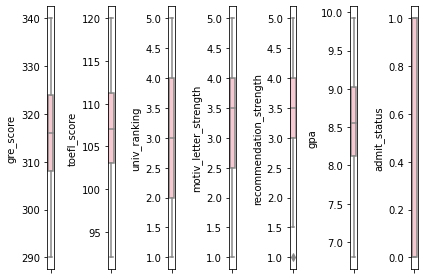

In [ ]:
#Boxplot
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=admission[features[i]], color='blue')
    plt.tight_layout()

Observations:

1.   There are an outliers in recommendation_strength, but the outliers are still normal and no need to be dropped



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

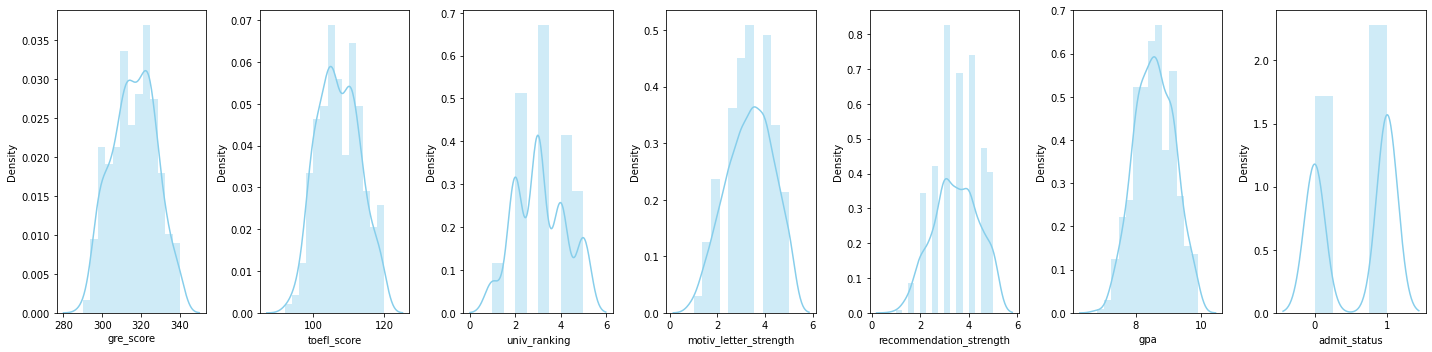

In [ ]:
#KDE plot
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=admission[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observations:
1.   All columns have symmetric distribution, motiv_letter_strength and gpa are the most symmetric distribution



# Bivariate Analysis

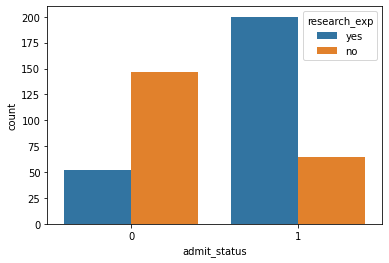

In [ ]:
#Bar graph for categoricals column
sns.countplot(data = admission,
                x= 'admit_status',
              hue= 'research_exp')

Observations: <br>
The students who have research experience is more likely admitted to the university





## Correlation Heatmap

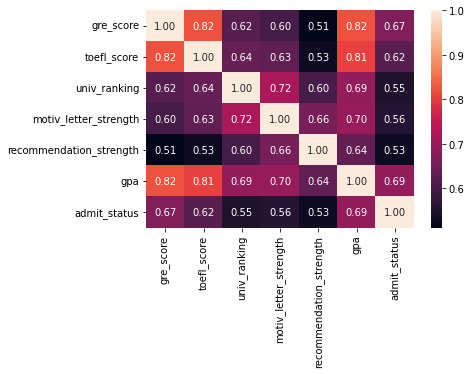

In [ ]:
correlation = admission.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observations: 
*   gre_score and toefl_score is highly correlated
*   gpa and toefl_score is also highly correlated
*   gre_score and gpa is also highly correlated <br>
Therefore, choose only 1 column that has the highest correlation with admit_status column for modelling and drop another column that highly correlated


## Pairplot

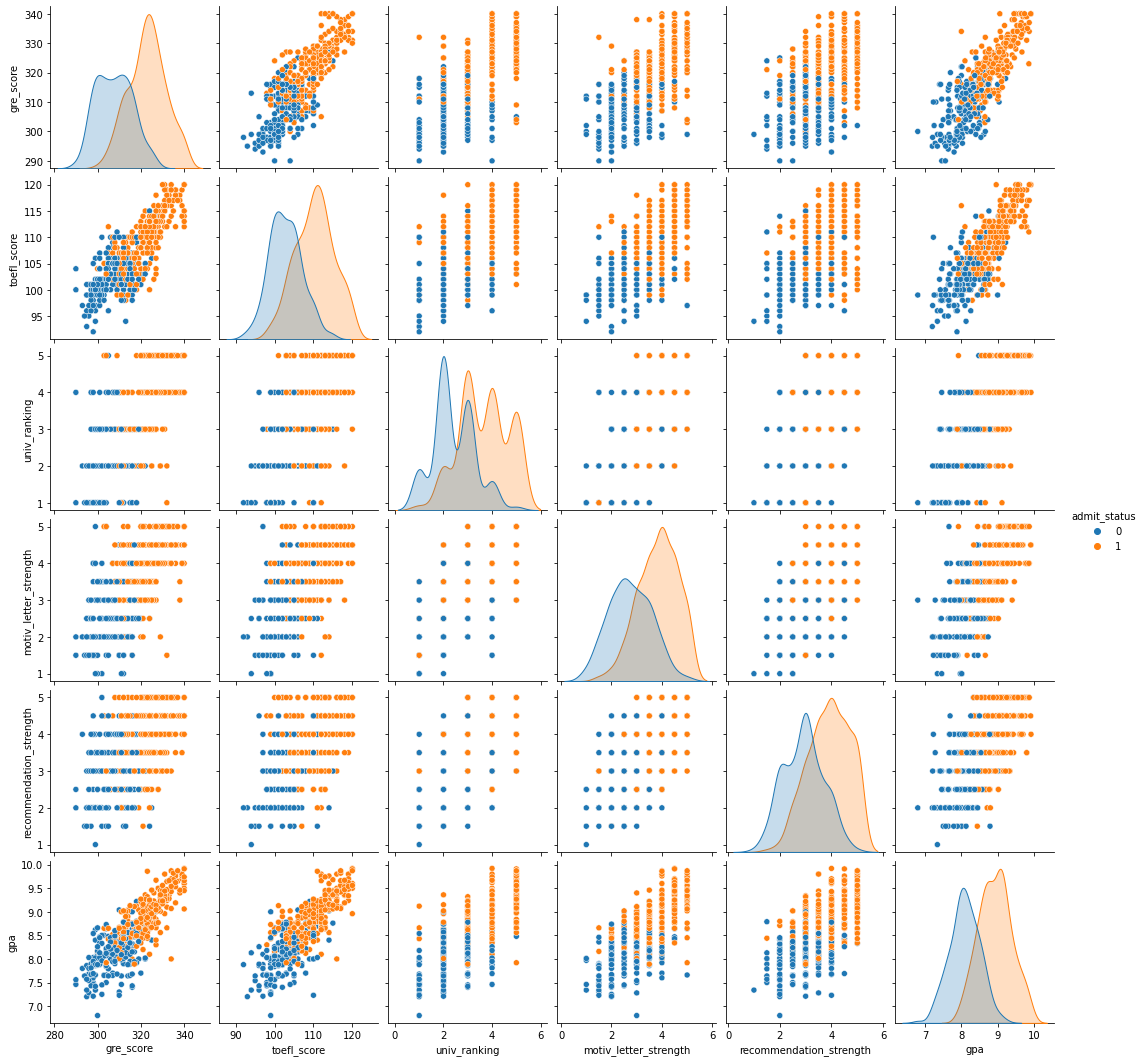

In [ ]:
sns.pairplot(admission, hue='admit_status')

Observations:

1.   Students who have high score in gre_score, toefl_score, and gpa are admitted to the university




# EDA Conclusions

**Conclusions**

*   The data does not contain major issues. There are less than 2% null values and duplicated rows.
*   Most of the numeric columns is symmetrically distributed and outliers in recommendation_strength are still normal.
* The students who have research experience is more likely to be admitted
* From correlation heatmap, toefl_score, gre_score and gpa is highly correlated, choose only 1 column that has the highest correlation with admit_status column for modelling and drop another column
* The students that admitted mostly have high score in gpa, gre_score, and toefl_score
